In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np
from scipy.stats import linregress
import statistics

#Study files

music_norm_path = "../ProjectData/songs_normalize.csv"

music_norm = pd.read_csv(music_norm_path, encoding = "utf-8-sig")


The r-squared is: 0.0022  Line Eq: y = 0.09x + 223.34   Median Song Length: 223.07


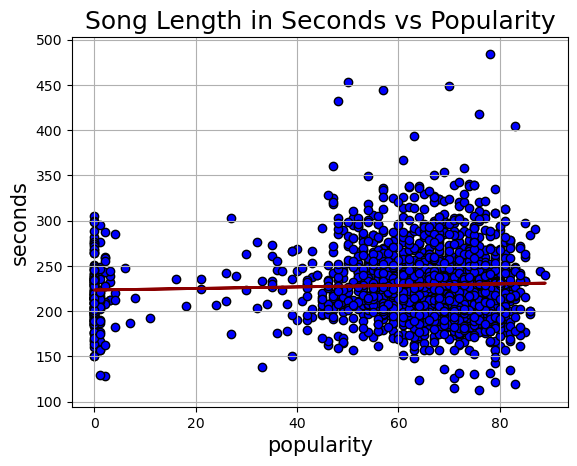


 Hypothesis: If song length can be used as an indicator to determine its popularity.
 Null Hypothesis: There is no significant correlation between song length and its popularity.
 Alternative Hypothesis: Song length is an indicator of song popularity.
  


In [2]:
#Length of Song vs Popularity - Daniel
#Creating a DataFram
           
LengthVSPop_df = pd.DataFrame(music_norm)

# #Creating x and y values
x_values = LengthVSPop_df["popularity"]
y_values = LengthVSPop_df["duration_ms"]/1000

song_length_median = statistics.median(y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)
plt.grid()
plt.title("Song Length in Seconds vs Popularity",fontsize=18)

plt.ylabel("seconds", fontsize=15, color="black")
plt.xlabel("popularity", fontsize=15, color="black")
print(f"\nThe r-squared is: {round((rvalue**2),4)}  Line Eq: {line_eq}   Median Song Length: {round((song_length_median),2)}")
plt.show()


print("\n Hypothesis: If song length can be used as an indicator to determine its popularity."
        "\n Null Hypothesis: There is no significant correlation between song length and its popularity."
        "\n Alternative Hypothesis: Song length is an indicator of song popularity."
        "\n  ")

-5.273  -5.497245740836345  1.9286767285087072


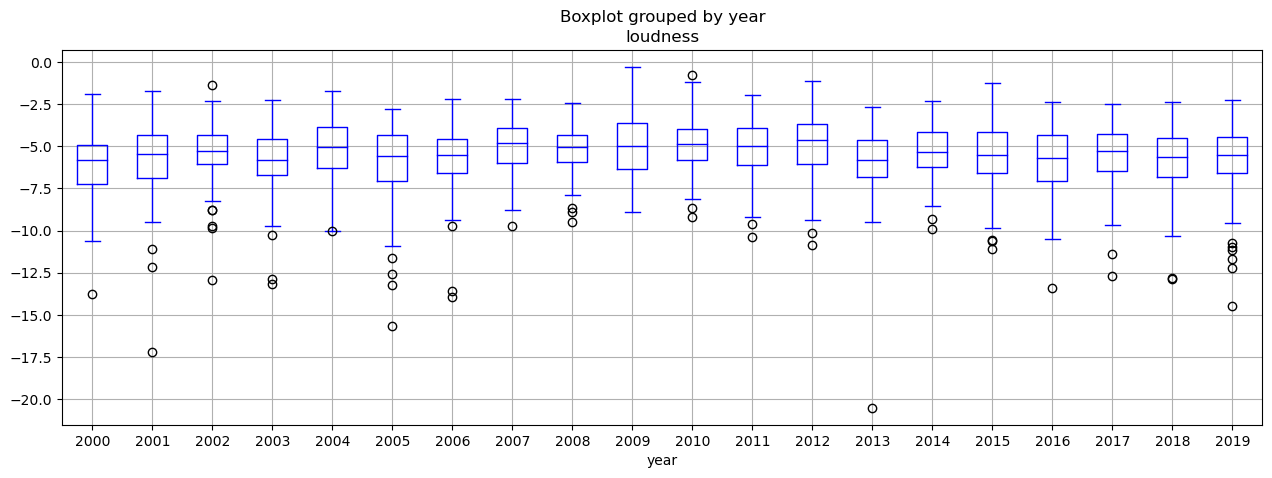

In [3]:
#Length of Song vs Popularity - Daniel
#Creating a DataFram
LoudnessVSYr_df = pd.DataFrame(music_norm)
#Creating x and y values
x_values = LoudnessVSYr_df["year"]
y_values = LoudnessVSYr_df["loudness"]
song_loudness_median = statistics.median(y_values)
song_loudness_mean = statistics.mean(y_values)
song_loudness_std = statistics.pstdev(y_values)
                                     
print(f"{song_loudness_median}  {song_loudness_mean}  {song_loudness_std}")


plt.rcParams['figure.figsize'] = (15,5)
LoudnessVSYr_df.boxplot(by ="year", grid='True',column =["loudness"], color="blue")

mean = LoudnessVSYr_df["loudness"].groupby(LoudnessVSYr_df["year"]).mean()
median = LoudnessVSYr_df["loudness"].groupby(LoudnessVSYr_df["year"]).median()
std = LoudnessVSYr_df["loudness"].groupby(LoudnessVSYr_df["year"]).std()
statistics_table = pd.DataFrame({"Mean Loudness by Year":mean, 
                            "Median Loudness by Year":median, 
                            "Std. Dev. Loudness by Year":std})
# statistics_table.head(-1)